# 46-926, Statistical Machine Learning 1: Homework 1

*Author*  : Jordan Giebas <br>
*Due Date*: January 22nd, 2018 

## Question 1:

I previously had all of the required packages downloaded. The below input/output cell gives proof,

In [172]:
!pip3 install scipy numpy sklearn

## Question 2(i):

In question two, we explore the relationship between the correlation of linear regression feature variables and the variance of the estimated parameters for one on the features.

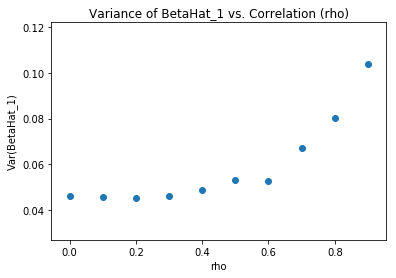

In [173]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

def build_training_df( num_obs, rho ):

    n = num_obs
    x_means = [0,0]
    x_cov = [[1,rho],[rho,1]]
    feature_list = [np.random.multivariate_normal(x_means,x_cov) for i in range(n)]

    x1_list = pd.Series([x[0] for x in feature_list])
    x2_list = pd.Series([x[1] for x in feature_list])
    eps_list = pd.Series([np.random.normal() for i in range(n)])

    y_list = pd.Series(np.array([ x[0] + x[1] + e for x,e in zip(feature_list, eps_list)]))

    df = pd.concat([x1_list,x2_list,y_list], axis=1)
    df.columns = ['X_1', 'X_2','Y']
    
    return df

def get_b1h( df ):
    
    # create a fitted model with all three features
    lm = sm.ols(formula='Y ~ X_1 + X_2', data=df).fit()
    return lm.bse['X_1']

def driver_2a():
    
    r_ = np.arange(0.0,1.0,0.1)
    bh1_ = [get_b1h(build_training_df(500, rho)) for rho in rho_list]
    
    %matplotlib inline
    plt.ylabel('Var(BetaHat_1)')
    plt.xlabel('rho')
    plt.title('Variance of BetaHat_1 vs. Correlation (rho)')
    plt.scatter(r_,bh1_)

driver_2a()


There appears to be a strong, nearly quadratic,  relationship between $\rho$ and $\hat{\beta_{1}}$. The only hiccup is near $\rho=0.2$, when the relationship hits a local maximum.

## Question 2(ii):

fdslakj;

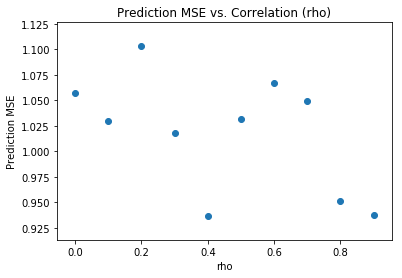

In [174]:
def build_test_df( num_obs, rho ):
    
    n = num_obs
    x_means = [0,0]
    x_cov = [[1,rho],[rho,1]]
    feature_list = [np.random.multivariate_normal(x_means,x_cov) for i in range(n)]

    x1_list = pd.Series([x[0] for x in feature_list])
    x2_list = pd.Series([x[1] for x in feature_list])
    eps_list = pd.Series([np.random.normal() for i in range(n)])

    y_list = pd.Series(np.array([ x[0] + x[1] + e for x,e in zip(feature_list, eps_list)]))

    df = pd.concat([x1_list,x2_list,y_list], axis=1)
    df.columns = ['X_1', 'X_2','Y_act']
    
    return df

def get_linear_model( df ):
    
    lm = sm.ols(formula='Y ~ X_1 + X_2', data=df).fit()
    return lm
    
    
def get_mse( lm, rho ):
    
    # Build the test dataframe with the rho passed in
    test_df = build_test_df(500,rho)
    
    # Generate the predicted Y values using the linear model passed in,
    # and determine the squared error
    test_df['Y_pred'] = lm.predict(test_df)
    test_df['Y_err'] = (test_df.Y_act - test_df.Y_pred)**2
    
    # Return the mean squared error 
    return test_df.Y_err.mean()

    
def driver_2b():
    
    rho_list = np.arange(0.0,1.0,0.1)
    
    # Generate training data set, and get linear model
    train_df = build_training_df(500, rho)
    lm = get_linear_model( train_df )
    
    # Pass the linear model and the rho into the get_avgerr function
    avgerr_list = [get_mse(lm, rho) for rho in rho_list]
        
    %matplotlib inline
    plt.ylabel('Prediction MSE')
    plt.xlabel('rho')
    plt.title('Prediction MSE vs. Correlation (rho)')
    plt.scatter(rho_list, avgerr_list)
    
    
driver_2b()
    


There appears to be no significant relationship between the correlation of the feature variables and the Mean Squared Error (MSE) of the predicted values. 

## Question 3:

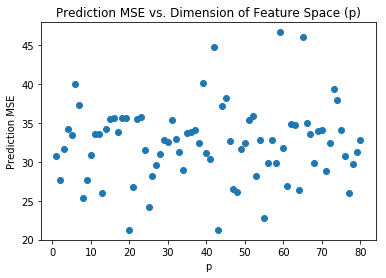

In [189]:
from sklearn.linear_model import LinearRegression


# Need to generate p features
n = 100
m = 1000


p_dict = {}
for p in range(1,81):
    
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    feature_cols = []
    
    # Set up the dataframe
    for i in range(1,p+1):
        
        x_list  = pd.Series([np.random.normal() for j in range(n)]) 
        x2_list = pd.Series([np.random.normal() for j in range(m)]) 
        
        x_str = "X_" + str(i)
        feature_cols.append(x_str)
        
        df_train[x_str] = x_list
        df_test[x_str] = x2_list
    
    # Set response var as described 4*X_{0} + eps
    df_train['Y'] = 4*df_train.X_1 + np.random.normal()
    df_test['Y_act'] = df_train.Y
    
    # Extract features and responses
    X = df_train[feature_cols]
    y = df_train.Y

    # Perform the linear fit
    lm = LinearRegression()
    lm.fit(X,y)
    
    ### NEED TO DRAW A SET OF m = 1000 datapoints
    X_new = df_test[feature_cols]
    df_test['Y_pred'] = lm.predict(X_new)
    df_test['Y_err'] = (df_test.Y_act - df_test.Y_pred)**2
    mse = df_test.Y_err.mean()

    # Get betahat_vec
    betahat_vec = lm.coef_
    
    # Store into dictionary
    p_dict[p] = [betahat_vec,mse]
    

p_list   = [p for p in p_dict.keys()]
mse_list = [p_dict[k][1] for k in p_dict.keys() ] 
%matplotlib inline
plt.ylabel('Prediction MSE')
plt.xlabel('p')
plt.title('Prediction MSE vs. Dimension of Feature Space (p)')
plt.scatter(p_list, mse_list)

## Question 4(a):

In [203]:
def q4_a():

    # Estimator I: Using the mean 
    def est1_mse():

        sqerr_list = [(np.random.exponential(1) - 1)**2 for i in range(1000)]
        mse_e1 = np.mean(sqerr_list)

        return mse_e1

    # Estimator II: Using the median
    def est2_mse():

        sqerr_list = [(np.random.exponential(1) - np.log(2))**2 for i in range(1000)]
        mse_e2 = np.mean(sqerr_list)

        return mse_e2

    def print_helper( s ):

        print("Estimator %s is better, since it has a lower MSE" % s)


    print("The MSE for estimator I: ", est1_mse())
    print("The MSE for estimator II: ", est2_mse())

    print_helper("I") if (est1_mse() < est2_mse()) else print_helper("II")
    
q4_a()



The MSE for estimator I:  0.933108751005
The MSE for estimator II:  1.4039234834
Estimator I is better, since it has a lower MSE


## Question 4(b):

In [205]:
from math import fabs

def q4_b():

    # Estimator I: Using the mean 
    def est1_mse():

        sqerr_list = [fabs(np.random.exponential(1) - 1) for i in range(1000)]
        mse_e1 = np.mean(sqerr_list)

        return mse_e1

    # Estimator II: Using the median
    def est2_mse():

        sqerr_list = [fabs(np.random.exponential(1) - np.log(2)) for i in range(1000)]
        mse_e2 = np.mean(sqerr_list)

        return mse_e2

    def print_helper( s ):

        print("Estimator %s is better, since it has a lower MSE" % s)


    print("The MSE for estimator I: ", est1_mse())
    print("The MSE for estimator II: ", est2_mse())

    print_helper("I") if (est1_mse() < est2_mse()) else print_helper("II")
    
q4_b()

The MSE for estimator I:  0.74129428077
The MSE for estimator II:  0.692825793092
Estimator II is better, since it has a lower MSE


This is interesting. By the above two cells, we see that the estimator II, the estimator using the median, is better when using the median squared prediction error but it's worse when using the mean squared error per usual. 